In [2]:
import sys
import string
import os
import numpy as np
from math import pi
import scipy.stats

import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

DNA


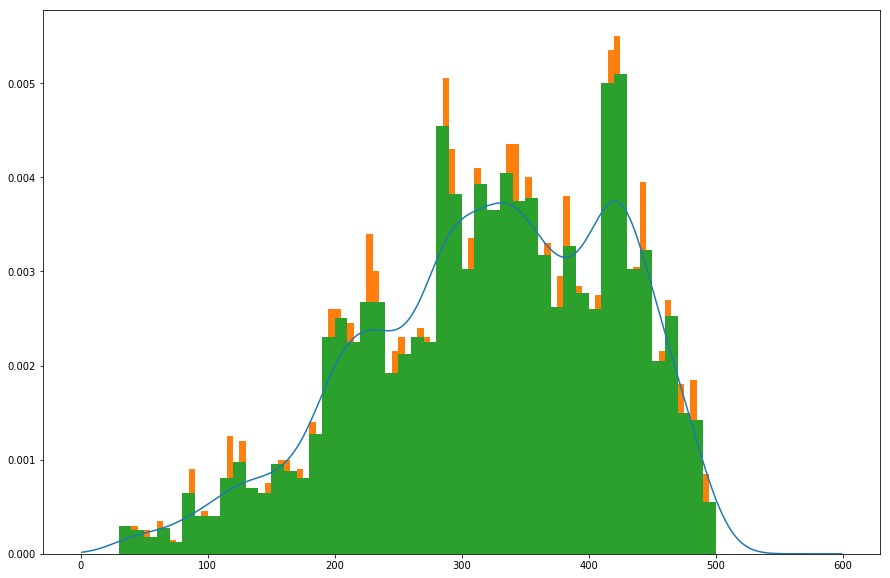

In [4]:

#Указываем: шаг по фреймам, максимальное количество фрейм (как автоматизировать?)

step = 1
max_frame = 5000

# In[34]:

for elem in (['DNA']):
    print(elem)
#     if not os.path.exists(f'../DNA/dsDNA/{}bp/%smM/push_from_30nm/radius_vectors'):
#         os.mkdir(f'dsDNA_4000bp_50mM/{elem}_rad_distr')
    for frame in tqdm(range(1000, 1001, step)):
        #Считываем координаты всех частиц
        fname = f'../DNA/dsDNA/4000bp/50mM/push_100k_steps/radius_vectors/run_1/{elem}.{frame}.dat'
        fig = plt.figure(figsize = (15,10))
        #Вычисляем радиальное распределение
        x = np.arange(1,600)
        data = np.array([float(i.strip()) for i in open(fname)])
        # Посторой гистограммы hist(data, bins=[1, 2, 3, 4])  и сравни с графиком (x, pdf)
        s = np.histogram(data, bins = range(0,600,1))
        pdf = np.array(scipy.stats.gaussian_kde(data).pdf(x))
#         pdf1 = np.array(scipy.stats.gaussian_kde(data, bw_method='scott').pdf(x))
#         pdf2 = np.array(scipy.stats.gaussian_kde(data, bw_method=0.2).pdf(x))
        denom = x*x*4*pi
        pltdt = np.divide(pdf, denom)
        pltdt /= sum(pltdt)
#         pltdt1 = np.divide(pdf1, denom)
#         pltdt1 /= sum(pltdt1)
#         pltdt2 = np.divide(pdf2, denom)
#         pltdt2 /= sum(pltdt2)
#         h = s[0]/(s[1][:-1]**2)
#         print(s)
        plt.plot(x, pdf)
#         plt.plot(x, pltdt1)
#         plt.ylim(0,0.00001)
#         plt.plot(x, pltdt2)
#         plt.plot(s[1][:-1], h)
        plt.hist(data, bins = range(0,600,5), density=True)
        plt.hist(data, bins = range(0,600,10), density=True)

        #Сохраняем то, что посчитали
#         file = open(f'dsDNA_4000bp_50mM/{elem}_rad_distr/{frame}.dat', "w")
#         for i,j in enumerate(x):
#             file.write(str(j) + '\t' + str(pltdt[i]) + '\n')
#         file.close()
#     plt.show()


Write the length of DNA in bp:
10000


  0%|          | 0/1 [00:00<?, ?it/s]

DNA
Na



  0%|          | 0/1 [00:00<?, ?it/s]

Cl



100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


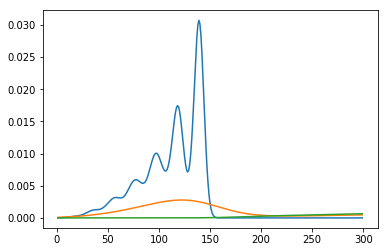

In [40]:
import sys
import string
import os
import numpy as np
from math import pi
import scipy.stats

import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm


print('Write the length of DNA in bp:')
bp = int(input().strip())


step = 1
fname = f'../DNA/dsDNA/{bp}bp/50mM/push_from_30nm/dsDNA_{bp}bp_50mM_pressure_push.dat'
with open(fname, 'r') as fh:
    max_frame = int(fh.readlines()[-1].split()[0]) // 10000

# In[34]:

for elem in tqdm(['DNA', 'Na', 'Cl']):
    print(elem)
    if not os.path.exists(f'../DNA/dsDNA/{bp}bp/50mM/push_from_30nm/rad_distr'):
        os.mkdir(f'../DNA/dsDNA/{bp}bp/50mM/push_from_30nm/rad_distr')
    if not os.path.exists(f'../DNA/dsDNA/{bp}bp/50mM/push_from_30nm/rad_distr/{elem}'):
        os.mkdir(f'../DNA/dsDNA/{bp}bp/50mM/push_from_30nm/rad_distr/{elem}')
    for frame in tqdm(range(3000, 3001, step)):

        fname = f'../DNA/dsDNA/{bp}bp/50mM/push_from_30nm/radius_vectors/{elem}.{frame}.dat'
        data = np.array([float(i.strip()) for i in open(fname)])

        x = np.arange(1,300)
        pdf = np.array(scipy.stats.gaussian_kde(data).pdf(x))
        denom = x*x*4*pi
        pltdt = np.divide(pdf, denom)
        pltdt /= sum(pltdt)
        plt.plot(x, pdf)